This notebook plots the number of k-mers per model. The input file is based on the number of lines in `*vite_vars_seed*.txt`, reproduced below:
```
   39628 iHMP_vita_vars_seed1.txt
   38147 iHMP_vita_vars_seed2.txt
   38856 iHMP_vita_vars_seed3.txt
   38430 iHMP_vita_vars_seed4.txt
   38755 iHMP_vita_vars_seed5.txt
   40744 iHMP_vita_vars_seed6.txt
   35343 PRJEB2054_vita_vars_seed1.txt
   34476 PRJEB2054_vita_vars_seed2.txt
   34043 PRJEB2054_vita_vars_seed3.txt
   33654 PRJEB2054_vita_vars_seed4.txt
   34023 PRJEB2054_vita_vars_seed5.txt
   33801 PRJEB2054_vita_vars_seed6.txt
   40726 PRJNA237362_vita_vars_seed1.txt
   39161 PRJNA237362_vita_vars_seed2.txt
   38587 PRJNA237362_vita_vars_seed3.txt
   36030 PRJNA237362_vita_vars_seed4.txt
   39309 PRJNA237362_vita_vars_seed5.txt
   39015 PRJNA237362_vita_vars_seed6.txt
   41701 PRJNA385949_vita_vars_seed1.txt
   40662 PRJNA385949_vita_vars_seed2.txt
   39631 PRJNA385949_vita_vars_seed3.txt
   37831 PRJNA385949_vita_vars_seed4.txt
   40031 PRJNA385949_vita_vars_seed5.txt
   40712 PRJNA385949_vita_vars_seed6.txt
   32578 PRJNA400072_vita_vars_seed1.txt
   31779 PRJNA400072_vita_vars_seed2.txt
   32472 PRJNA400072_vita_vars_seed3.txt
   31338 PRJNA400072_vita_vars_seed4.txt
   33285 PRJNA400072_vita_vars_seed5.txt
   32214 PRJNA400072_vita_vars_seed6.txt
   29264 SRP057027_vita_vars_seed1.txt
   30804 SRP057027_vita_vars_seed2.txt
   29581 SRP057027_vita_vars_seed3.txt
   28945 SRP057027_vita_vars_seed4.txt
   29992 SRP057027_vita_vars_seed5.txt
   28684 SRP057027_vita_vars_seed6.txt
 1284232 total
 ```

In [1]:
setwd("..")

In [5]:
library(dplyr)
library(readr)
library(ggplot2)

In [7]:
kmers <- read_delim("tmp.txt", col_names = c("X1", "X2", "X3", "kmers", "model"), delim = " ", show_col_types = F) %>%
  select(kmers, model) %>%
  mutate(study = gsub("_.*", "", model)) %>%
  filter(!is.na(model)) %>%
  mutate(study = factor(study, levels = c('PRJNA385949',  'PRJNA237362', 'iHMP', 'PRJEB2054', 'PRJNA400072', 'SRP057027')))

Warning message:
“One or more parsing issues, see `problems()` for details”


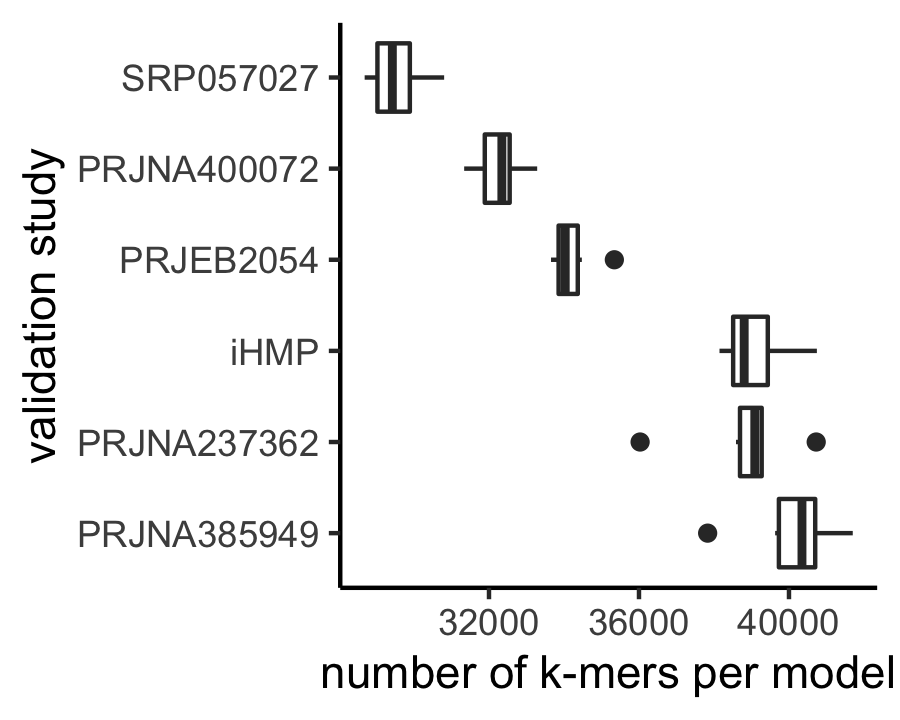

In [10]:
# adjust plot size rendered inline
options(repr.plot.width = 3, repr.plot.height = 2.4, repr.plot.res = 300)

#pdf("figures/kmers_per_model.pdf", height = 2.4, width = 3)
ggplot(kmers, aes(x = study, y = kmers)) +
  geom_boxplot() +
  theme_classic() +
  coord_flip() +
  labs(y = "number of k-mers per model", x = "validation study")
#dev.off()
